<img src="pandas_logo.svg" alt="NumPy Logo" style="width:250px; height:100px;">
<h1>Data Cleaning, Correlation, and Plotting in Pandas</h1>

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df = pd.DataFrame(
    {
        "Duration":[60, 60, 60, 45, 45, 60, 60, 450, 30, 60],
        "Date":["2020/12/01", "2020/12/02", "2020/12/03", "2020/12/04", "2020/12/05", "2020/12/06", "2020/12/07", "2020/12/08", np.nan, "2020/12/10"],
        "Pulse":np.random.randint(90, 120, size = 10),
        "Maxpulse":np.random.randint(100, 130, size = 10),
        "Calories":[409.1, 479.0, np.nan, 282.4, 406.0, 300.0, 374.0, 253.3, np.nan, 259.0]
    }
)
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,103,108,409.1
1,60,2020/12/02,113,112,479.0
2,60,2020/12/03,102,102,NaN
3,45,2020/12/04,100,110,282.4
4,45,2020/12/05,96,118,406.0
5,60,2020/12/06,93,113,300.0
6,60,2020/12/07,105,127,374.0
7,450,2020/12/08,94,113,253.3
8,30,NaN,107,113,NaN
9,60,2020/12/10,105,104,259.0


<h3>Data Cleaning:</h3>
<ul>
    <li>Data cleaning means fixing the bad data in your data set.</li>
    <li>Bad data could be:
       <ul>
        <li>Empty Cells</li>
        <li>Data in Wrong Format</li>
        <li>Wrong Data</li>
        <li>Duplicates</li>
    </ul>
    </li>
</ul>

<h4>1. Handling Empty Cells:</h4>

In [134]:
df.dropna()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,103,108,409.1
1,60,2020/12/02,113,112,479.0
3,45,2020/12/04,100,110,282.4
4,45,2020/12/05,96,118,406.0
5,60,2020/12/06,93,113,300.0
6,60,2020/12/07,105,127,374.0
7,450,2020/12/08,94,113,253.3
9,60,2020/12/10,105,104,259.0


In [136]:
df["Calories"].dropna()

0    409.1
1    479.0
3    282.4
4    406.0
5    300.0
6    374.0
7    253.3
9    259.0
Name: Calories, dtype: float64

In [138]:
df.fillna(120)

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,103,108,409.1
1,60,2020/12/02,113,112,479.0
2,60,2020/12/03,102,102,120.0
3,45,2020/12/04,100,110,282.4
4,45,2020/12/05,96,118,406.0
5,60,2020/12/06,93,113,300.0
6,60,2020/12/07,105,127,374.0
7,450,2020/12/08,94,113,253.3
8,30,120,107,113,120.0
9,60,2020/12/10,105,104,259.0


In [140]:
df["Calories"].fillna(120)

0    409.1
1    479.0
2    120.0
3    282.4
4    406.0
5    300.0
6    374.0
7    253.3
8    120.0
9    259.0
Name: Calories, dtype: float64

In [142]:
x = df["Calories"].mean()
df["Calories"].fillna(x)

0    409.10
1    479.00
2    345.35
3    282.40
4    406.00
5    300.00
6    374.00
7    253.30
8    345.35
9    259.00
Name: Calories, dtype: float64

In [144]:
x = df["Calories"].median()
df["Calories"].fillna(x)

0    409.1
1    479.0
2    337.0
3    282.4
4    406.0
5    300.0
6    374.0
7    253.3
8    337.0
9    259.0
Name: Calories, dtype: float64

In [146]:
x = df["Calories"].mode()[0]
df["Calories"].fillna(x)

0    409.1
1    479.0
2    253.3
3    282.4
4    406.0
5    300.0
6    374.0
7    253.3
8    253.3
9    259.0
Name: Calories, dtype: float64

<h4>2. Handling the Data in the wrong format:</h4>

In [149]:
df["Date"] = pd.to_datetime(df["Date"])
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,103,108,409.1
1,60,2020-12-02,113,112,479.0
2,60,2020-12-03,102,102,NaN
3,45,2020-12-04,100,110,282.4
4,45,2020-12-05,96,118,406.0
5,60,2020-12-06,93,113,300.0
6,60,2020-12-07,105,127,374.0
7,450,2020-12-08,94,113,253.3
8,30,NaT,107,113,NaN
9,60,2020-12-10,105,104,259.0


In [151]:
df["Date"].dropna()

0   2020-12-01
1   2020-12-02
2   2020-12-03
3   2020-12-04
4   2020-12-05
5   2020-12-06
6   2020-12-07
7   2020-12-08
9   2020-12-10
Name: Date, dtype: datetime64[ns]

In [153]:
df.dropna(subset = ["Date"])

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,103,108,409.1
1,60,2020-12-02,113,112,479.0
2,60,2020-12-03,102,102,NaN
3,45,2020-12-04,100,110,282.4
4,45,2020-12-05,96,118,406.0
5,60,2020-12-06,93,113,300.0
6,60,2020-12-07,105,127,374.0
7,450,2020-12-08,94,113,253.3
9,60,2020-12-10,105,104,259.0


<h4>3. Handling the Wrong Data:</h4>

In [156]:
df.loc[7, "Duration"] = 45

In [158]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,103,108,409.1
1,60,2020-12-02,113,112,479.0
2,60,2020-12-03,102,102,NaN
3,45,2020-12-04,100,110,282.4
4,45,2020-12-05,96,118,406.0
5,60,2020-12-06,93,113,300.0
6,60,2020-12-07,105,127,374.0
7,45,2020-12-08,94,113,253.3
8,30,NaT,107,113,NaN
9,60,2020-12-10,105,104,259.0


In [160]:
for x in df.index:
    if df.loc[x, "Duration"] > 120:
        df.loc[x, "Duration"] = 120
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,103,108,409.1
1,60,2020-12-02,113,112,479.0
2,60,2020-12-03,102,102,NaN
3,45,2020-12-04,100,110,282.4
4,45,2020-12-05,96,118,406.0
5,60,2020-12-06,93,113,300.0
6,60,2020-12-07,105,127,374.0
7,45,2020-12-08,94,113,253.3
8,30,NaT,107,113,NaN
9,60,2020-12-10,105,104,259.0


In [162]:
for x in df.index:
    if df.loc[x, "Duration"] > 120:
        df.drop(x)
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,103,108,409.1
1,60,2020-12-02,113,112,479.0
2,60,2020-12-03,102,102,NaN
3,45,2020-12-04,100,110,282.4
4,45,2020-12-05,96,118,406.0
5,60,2020-12-06,93,113,300.0
6,60,2020-12-07,105,127,374.0
7,45,2020-12-08,94,113,253.3
8,30,NaT,107,113,NaN
9,60,2020-12-10,105,104,259.0


<h4>4. Handling the Duplicates:</h4>

In [165]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [167]:
df.duplicated().sum()

0

In [169]:
df.drop_duplicates()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,103,108,409.1
1,60,2020-12-02,113,112,479.0
2,60,2020-12-03,102,102,NaN
3,45,2020-12-04,100,110,282.4
4,45,2020-12-05,96,118,406.0
5,60,2020-12-06,93,113,300.0
6,60,2020-12-07,105,127,374.0
7,45,2020-12-08,94,113,253.3
8,30,NaT,107,113,NaN
9,60,2020-12-10,105,104,259.0


<h3>Data Correlation:</h4>

In [172]:
df.corr()

,Duration,Date,Pulse,Maxpulse,Calories
Duration,1.000000,0.745349,0.126060,-0.155902,0.313280
Date,0.745349,1.000000,-0.293175,-0.049788,-0.733268
Pulse,0.126060,-0.293175,1.000000,-0.068224,0.577298
Maxpulse,-0.155902,-0.049788,-0.068224,1.000000,0.301708
Calories,0.313280,-0.733268,0.577298,0.301708,1.000000


<h3>Pandas - Plotting:</h3>

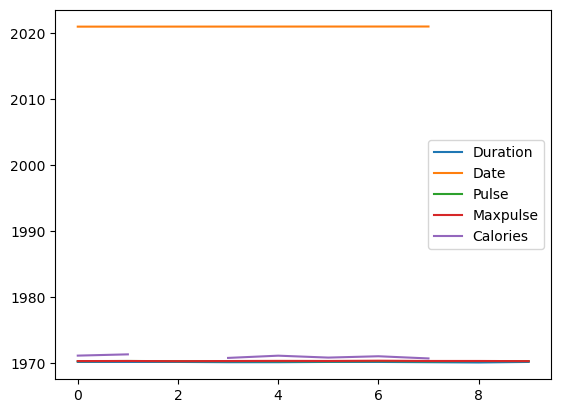

In [175]:
df.plot()
plt.show()

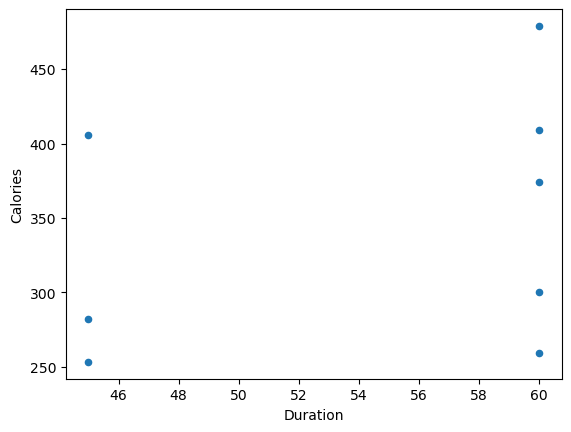

In [177]:
df.plot(kind = "scatter", x = "Duration", y = "Calories")
plt.show()

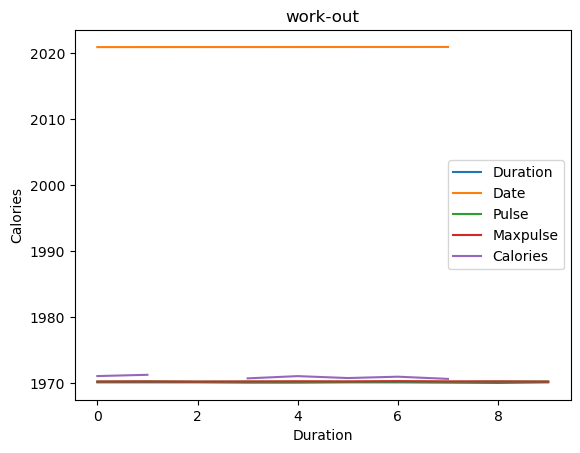

In [179]:
df.plot(kind = "line", xlabel = "Duration", ylabel = "Calories", title = "work-out")
plt.show()

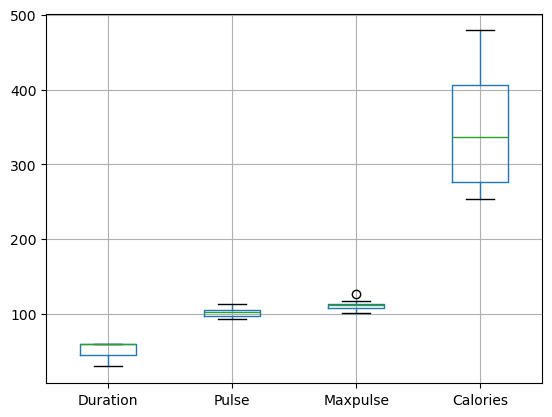

In [181]:
df.boxplot()
plt.show()

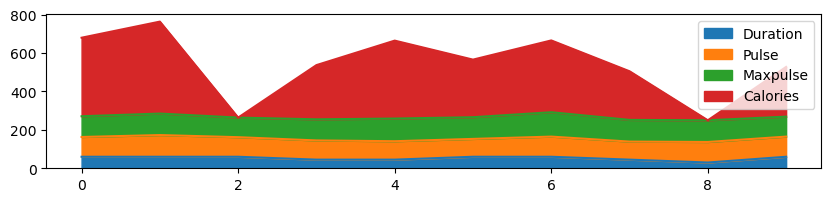

In [183]:
df.plot.area(figsize = (10,2))
plt.show()